# Bag Of Words (Sentiment Analysis)
NLP technique to represent text as words. Each words is represented as by its frequency in the corpus. Ignores grammar and order of occurance. Used for text classification, sentiment analysis, clustering, etc.

**Dataset** - Airbnb reviews dataset.

**Goal** - calculate the sentiment for each review and the overall sentiment for the Airbnb listing.

In [126]:
# Install dependencies as needed:
%pip install "kagglehub[pandas-datasets]"
import kagglehub
from kagglehub import KaggleDatasetAdapter

Note: you may need to restart the kernel to use updated packages.


## Fetch the data

In [127]:
# Set the path to the file you'd like to load
file_path = "reviews.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "muhammadahmedansari/airbnb-dataset",
  file_path,
)

df.head()


/var/folders/z7/9gcctx9x0mbdd_my53kngjz80000gn/T/ipykernel_40947/1218145017.py:5: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


,listing_id,id,date,reviewer_id,reviewer_name,comments
0,2818.0,1191.0,3/30/2009,10952,Lam,Daniel is really cool. The place was nice and ...
1,515749.0,1671407.0,7/9/2012,2640670,Gregory,If you want the authentic Amsterdam houseboat ...
2,515749.0,1715674.0,7/15/2012,1032804,Michael,Unique and luxurious to be sure. I couldn't re...
3,2818.0,1771.0,4/24/2009,12798,Alice,Daniel is the most amazing host! His place is ...
4,515749.0,1963378.0,8/12/2012,503786,Brian,My wife and I recently stopped in Amsterdam fo...


## Tokenize the reviews

In [ ]:
import nltk

# Clean HTML tags like <br/> and stray carriage returns from comments
df["comments"] = df["comments"].str.replace(r'<[^>]+>', ' ', regex=True).str.replace('\r', ' ').str.strip()
df["comments"].head()

words_in_reviews = []
listing_ids = []
# Tokenize comments into lowercase sentences
for _, row in df.iterrows():
    tokens = nltk.word_tokenize(str(row["comments"]).lower())
    words_in_reviews.append(tokens)
    listing_ids.append(row["listing_id"])

In [129]:
# view the first 5 reviews and their words
for i, words in enumerate(words_in_reviews[:5]):
    print(f"Review {i+1} (listing {int(listing_ids[i])}) words:", words)

Review 1 (listing 2818) words: ['daniel', 'is', 'really', 'cool', '.', 'the', 'place', 'was', 'nice', 'and', 'clean', '.', 'very', 'quiet', 'neighborhood', '.', 'he', 'had', 'maps', 'and', 'a', 'lonely', 'planet', 'guide', 'book', 'in', 'the', 'room', 'for', 'you', 'to', 'use', '.', 'i', 'didnt', 'have', 'any', 'trouble', 'finding', 'the', 'place', 'from', 'central', 'station', '.', 'i', 'would', 'defintely', 'come', 'back', '!', 'thanks', '!']
Review 2 (listing 515749) words: ['if', 'you', 'want', 'the', 'authentic', 'amsterdam', 'houseboat', 'experience', ',', 'this', 'is', 'it', '!', 'it', 'is', 'a', 'great', 'boat', ',', 'located', 'on', 'a', 'quiet', 'canal', 'with', 'a', 'view', 'of', 'the', 'rijksmuseum', 'towers', '.', 'spotlessly', 'clean', ',', 'comfortable', 'bed', ',', 'hot', 'shower', ',', 'good', 'wifi', 'signal', ',', 'nice', 'kitchen', 'with', 'fridge', ',', 'cofee', 'maker', ',', 'and', 'stove', 'for', 'cooking', 'meals', '.', 'the', 'location', 'is', 'very', 'accessib

## Generate the word-frequency

In [130]:
wordFreq = {}

for words in words_in_reviews: # for every review 
    for word in words: # for every word in the review
        if word in wordFreq:
            wordFreq[word] += 1
        else:
            wordFreq[word] = 1

In [131]:
# Print first 5 entries
dict(list(wordFreq.items())[:20])

{'daniel': 1339,
 'is': 270361,
 'really': 54853,
 'cool': 6316,
 '.': 977226,
 'the': 661577,
 'place': 119454,
 'was': 271218,
 'nice': 80869,
 'and': 601071,
 'clean': 65759,
 'very': 197801,
 'quiet': 30364,
 'neighborhood': 16388,
 'he': 25719,
 'had': 64687,
 'maps': 1624,
 'a': 413858,
 'lonely': 48,
 'planet': 39}

In [132]:
from nltk.corpus import stopwords
nltk.download('stopwords', quiet=True)

# filter stop words and non-alpha
stop_words = set(stopwords.words('english'))
filtered_wordFreq = {word: count for word, count in wordFreq.items() if word not in stop_words and word.isalpha()}

dict(list(filtered_wordFreq.items())[:20])

{'daniel': 1339,
 'really': 54853,
 'cool': 6316,
 'place': 119454,
 'nice': 80869,
 'clean': 65759,
 'quiet': 30364,
 'neighborhood': 16388,
 'maps': 1624,
 'lonely': 48,
 'planet': 39,
 'guide': 1133,
 'book': 5082,
 'room': 53053,
 'use': 7738,
 'didnt': 391,
 'trouble': 929,
 'finding': 651,
 'central': 23873,
 'station': 23051}

## Top 20 frequent words

In [133]:
print("Total unique words", len(filtered_wordFreq))
print("Words", list(filtered_wordFreq.keys()))

print()

# get a list of 20 most frequent words and their counts as dict
from collections import Counter
top_20_words_withFreq = dict(Counter(filtered_wordFreq).most_common(20))
print("Top 20 words with their frequencies:", top_20_words_withFreq)
top_20_words = list(top_20_words_withFreq.keys())
print("Top 20 words:", top_20_words)

Total unique words 136523
Words ['daniel', 'really', 'cool', 'place', 'nice', 'clean', 'quiet', 'neighborhood', 'maps', 'lonely', 'planet', 'guide', 'book', 'room', 'use', 'didnt', 'trouble', 'finding', 'central', 'station', 'would', 'defintely', 'come', 'back', 'thanks', 'want', 'authentic', 'amsterdam', 'houseboat', 'experience', 'great', 'boat', 'located', 'canal', 'view', 'rijksmuseum', 'towers', 'spotlessly', 'comfortable', 'bed', 'hot', 'shower', 'good', 'wifi', 'signal', 'kitchen', 'fridge', 'cofee', 'maker', 'stove', 'cooking', 'meals', 'location', 'accessible', 'museums', 'gym', 'bar', 'bakery', 'corner', 'nine', 'streets', 'area', 'lots', 'resaraunts', 'bars', 'jazz', 'clubs', 'vondelpark', 'shopping', 'utrechtstraat', 'sites', 'special', 'part', 'interested', 'boats', 'maritime', 'history', 'one', 'find', 'cabin', 'guests', 'stay', 'actually', 'cargo', 'hold', 'within', 'original', 'hull', 'freight', 'hauled', 'goods', 'holland', 'imagine', 'countless', 'tons', 'came', 'slee

## Generate Bag-of-words (BoW) Model

BoW is a matrix where each row is a review and each coloum represents the top N frequent words. If the word is present in the r3eview mark as 1 else 0. Essentially build a vector of high frequncy words.

In [134]:
import pandas as pd

bow = []
for review in words_in_reviews:
    vector = []
    for high_freq_word in top_20_words:
        if high_freq_word in review:
            vector.append(1)
        else:
            vector.append(0)
    bow.append(vector)

# Create a DataFrame with listing_id tracked per review
bow_df = pd.DataFrame(bow, columns=top_20_words)
bow_df.insert(0, "listing_id", [int(lid) for lid in listing_ids])

In [135]:
print("Bag of Words representation for the first 5 reviews:")
for i in range(5):
    print(f"Review {i+1} (listing {int(listing_ids[i])}) BoW:", bow[i])

Bag of Words representation for the first 5 reviews:
Review 1 (listing 2818) BoW: [0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0]
Review 2 (listing 515749) BoW: [1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
Review 3 (listing 515749) BoW: [1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0]
Review 4 (listing 2818) BoW: [0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
Review 5 (listing 515749) BoW: [0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0]


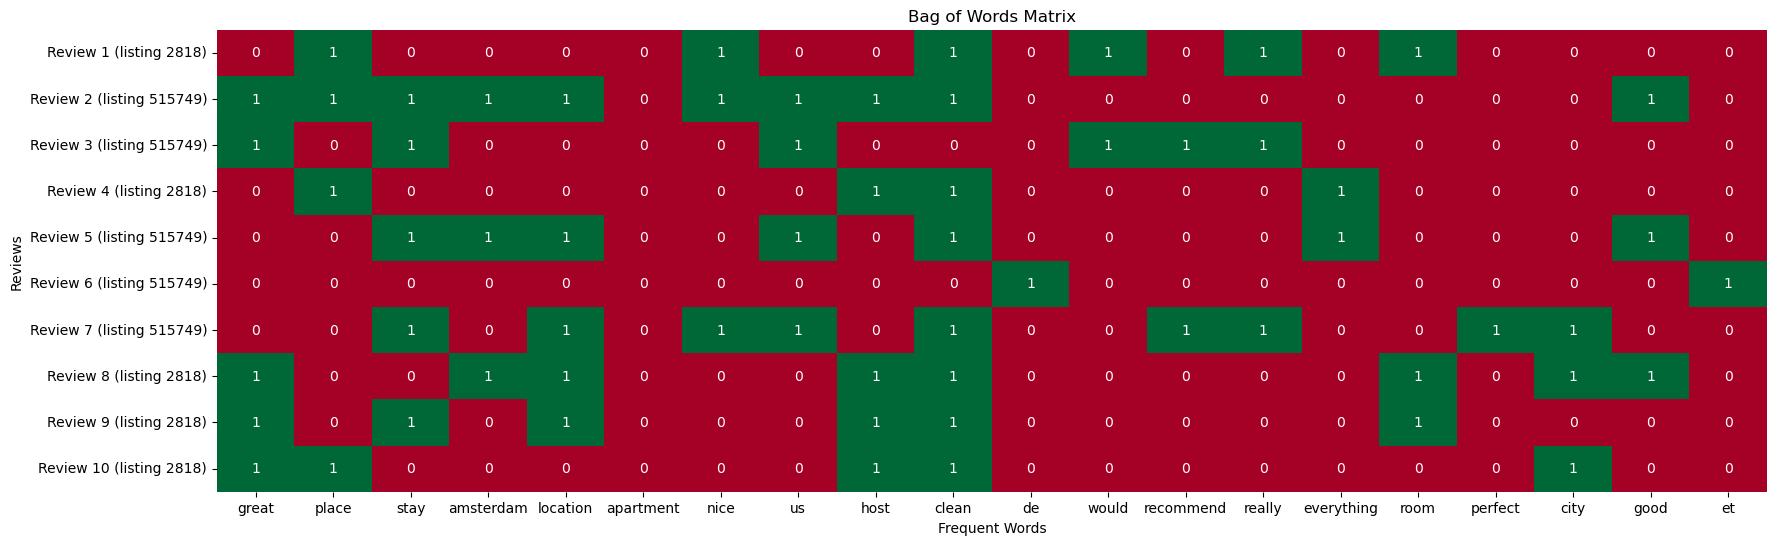

In [136]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

bow_matrix = np.asarray(bow)

plt.figure(figsize=(20, 6))
ylabels = [f"Review {i+1} (listing {int(listing_ids[i])})" for i in range(10)]
sns.heatmap(bow_matrix[:10], cmap='RdYlGn', cbar=False, annot=True, fmt="d", xticklabels=top_20_words, yticklabels=ylabels)

plt.title('Bag of Words Matrix')
plt.xlabel('Frequent Words')
plt.ylabel('Reviews')
plt.show()

## Listing Sentiment Analysis (using BoW)

Instead of using a pre-trained model, we define our own positive and negative word lists and score each review by counting how many of those words appear in its tokens.

In [137]:
# Positive & negative word lists (only words present in our dataset)
positive_words = {
    "accommodating", "adorable", "amazing", "appreciate", "appreciated",
    "attentive", "authentic", "awesome", "beautiful", "best", "blessed",
    "bright", "brilliant", "caring", "charming", "cheerful", "clean",
    "comfortable", "considerate", "convenient", "cosy", "cozy", "definitely",
    "delight", "delightful", "easy", "efficient", "elegant", "enjoyable",
    "enjoyed", "enjoying", "excellent", "exceptional", "exquisite", "fabulous",
    "fantastic", "fresh", "friendly", "gem", "generous", "good", "gorgeous",
    "gracious", "grateful", "great", "happy", "heaven", "helpful", "homely",
    "homey", "hospitable", "ideal", "immaculate", "impeccable", "impressive",
    "incredible", "inviting", "kind", "love", "loved", "lovely", "luxurious",
    "magical", "magnificent", "marvelous", "modern", "nice", "original",
    "outstanding", "paradise", "peaceful", "perfect", "phenomenal", "pleasant",
    "pleased", "polite", "positive", "pristine", "professional", "quiet",
    "recommend", "recommended", "refined", "relaxing", "reliable", "responsive",
    "romantic", "safe", "satisfying", "smooth", "spacious", "special",
    "splendid", "spotless", "stunning", "stylish", "superb", "superior",
    "sweet", "tasteful", "terrific", "thank", "thankful", "thanks",
    "thoughtful", "tidy", "treasure", "trustworthy", "unique", "value",
    "vibrant", "warm", "welcoming", "wonderful", "worth"
}

negative_words = {
    "abysmal", "angry", "annoying", "ants", "atrocious", "avoid", "awful",
    "bad", "bedbug", "bedbugs", "broken", "bug", "cancel", "cancelled",
    "cold", "complain", "complaint", "cramped", "creepy", "crowded",
    "damage", "damaged", "dangerous", "dark", "dated", "denied", "depressing",
    "difficult", "dirty", "disappointed", "disappointing", "disgusting",
    "dishonest", "disrespectful", "dissatisfied", "dreadful", "dusty",
    "error", "expensive", "fake", "filthy", "flea", "fleas", "fraud",
    "frustrated", "frustrating", "garbage", "gloomy", "gross", "hazard",
    "hazardous", "horrendous", "horrible", "inaccessible", "inadequate",
    "inconvenient", "infested", "insufficient", "issue", "issues", "lacking",
    "leaky", "lie", "lied", "lies", "loud", "mediocre", "messy", "mice",
    "miserable", "misleading", "mold", "moldy", "musty", "nasty", "negative",
    "neglected", "never", "nightmare", "noise", "noisy", "odor", "outdated",
    "overcharged", "overpriced", "pathetic", "pointless", "poor", "problem",
    "rats", "refund", "refused", "regret", "rude", "rundown", "rusty",
    "scam", "scary", "shabby", "shady", "sketchy", "small", "smell",
    "smelly", "stain", "sticky", "stinky", "stolen", "stuffy", "terrible",
    "theft", "toxic", "trash", "ugly", "unclean", "uncomfortable",
    "unfortunately", "unfriendly", "unhelpful", "unpleasant", "unprofessional",
    "unreliable", "unresponsive", "unsafe", "untidy", "upset", "useless",
    "warned", "warning", "waste", "wasted", "worn", "worst", "worthless",
    "wrong"
}

print(f"Positive words: {len(positive_words)}")
print(f"Negative words: {len(negative_words)}")


Positive words: 115
Negative words: 135


## Score each review

$$\text{sentiment score of each review} = \frac{\text{positive count} - \text{negative count}}{\text{positive count} + \text{negative count}}$$

score from **-1** (all negative) to **+1** (all positive).

In [138]:
# Score each review using our word lists
review_scores = []
for tokens in words_in_reviews:
    pos_count = sum(1 for t in tokens if t in positive_words)
    neg_count = sum(1 for t in tokens if t in negative_words)
    total = pos_count + neg_count
    score = (pos_count - neg_count) / total if total > 0 else 0.0
    review_scores.append({
        "pos_count": pos_count,
        "neg_count": neg_count,
        "score": score
    })

bow_df["pos_count"] = [s["pos_count"] for s in review_scores]
bow_df["neg_count"] = [s["neg_count"] for s in review_scores]
bow_df["sentiment"] = [s["score"] for s in review_scores]

bow_df[["listing_id", "pos_count", "neg_count", "sentiment"]].head()

,listing_id,pos_count,neg_count,sentiment
0,2818,4,0,1.000000
1,515749,15,0,1.000000
2,515749,11,1,0.833333
3,2818,5,0,1.000000
4,515749,7,0,1.000000


## BoW usage in Top 10 Positive vs Negative Reviews

Compare the average presence of the top 20 frequent words across the 10 most positive and 10 most negative individual reviews.

In [150]:
# Print top 10 positive reviews with their scores
top_pos_reviews = bow_df.nlargest(10, "sentiment")

print("=" * 80)
print("TOP 10 MOST POSITIVE REVIEWS")
print("=" * 80)
for rank, (idx, row) in enumerate(top_pos_reviews.iterrows(), 1):
    comment = df.iloc[idx]["comments"]
    print(f"\n#{rank} | Listing {int(row['listing_id'])} | Sentiment: {row['sentiment']:.3f} (pos={int(row['pos_count'])}, neg={int(row['neg_count'])})")
    print(f"   {comment[:300]}{'...' if len(str(comment)) > 300 else ''}")

TOP 10 MOST POSITIVE REVIEWS

#1 | Listing 2818 | Sentiment: 1.000 (pos=4, neg=0)
   Daniel is really cool. The place was nice and clean. Very quiet neighborhood. He had maps and a lonely planet guide book in the room for you to use. I didnt have any trouble finding the place from Central Station. I would defintely come back! Thanks!

#2 | Listing 515749 | Sentiment: 1.000 (pos=15, neg=0)
   If you want the authentic Amsterdam houseboat experience, this is it!  It is a great boat, located on a quiet canal with a view of the Rijksmuseum towers.  Spotlessly clean, comfortable bed, hot shower, good wifi signal, nice kitchen with fridge, cofee maker, and stove for cooking meals.  The locati...

#3 | Listing 2818 | Sentiment: 1.000 (pos=5, neg=0)
   Daniel is the most amazing host! His place is extremely clean, and he provides everything you could possibly want (comfy bed, guidebooks & maps, mini-fridge, towels, even toiletries). He is extremely friendly and helpful, and will go out of his 

In [149]:
# Print top 10 negative reviews with their scores
top_neg_reviews = bow_df.nsmallest(10, "sentiment")

print("\n" + "=" * 80)
print("TOP 10 MOST NEGATIVE REVIEWS")
print("=" * 80)
for rank, (idx, row) in enumerate(top_neg_reviews.iterrows(), 1):
    comment = df.iloc[idx]["comments"]
    print(f"\n#{rank} | Listing {int(row['listing_id'])} | Sentiment: {row['sentiment']:.3f} (pos={int(row['pos_count'])}, neg={int(row['neg_count'])})")
    print(f"   {comment[:300]}{'...' if len(str(comment)) > 300 else ''}")


TOP 10 MOST NEGATIVE REVIEWS

#1 | Listing 785432 | Sentiment: -1.000 (pos=0, neg=1)
   Erst das negative: Der Zustand vom Boot sieht auf den Bildern besser aus, als es wirklich ist. Auch die Betten könnten besser sein. Wir waren zu sechst auf dem Boot und zwei der Bette sind lediglich 1,20m oder 1,40m groß.     Aber die Lage ist gigantisch. Die Dachterrasse ist großartig. Die Küche is...

#2 | Listing 515921 | Sentiment: -1.000 (pos=0, neg=2)
   Our first time using airB&B so we weren't sure what to expect...Overall the apartment was fine for our stay with it being close to everything, cooking facilities,space and the host left plenty of information for us! The only negatives that we found were that it was a bit dirty (we had to wash the pl...

#3 | Listing 515921 | Sentiment: -1.000 (pos=0, neg=1)
   Merci à Anne Marie de nous avoir louer son appartement très bien situé à côté du parc Vondelpark.  Anne Marie nous a permis de récupérer les clefs facilement et idem en partant.  L'appa

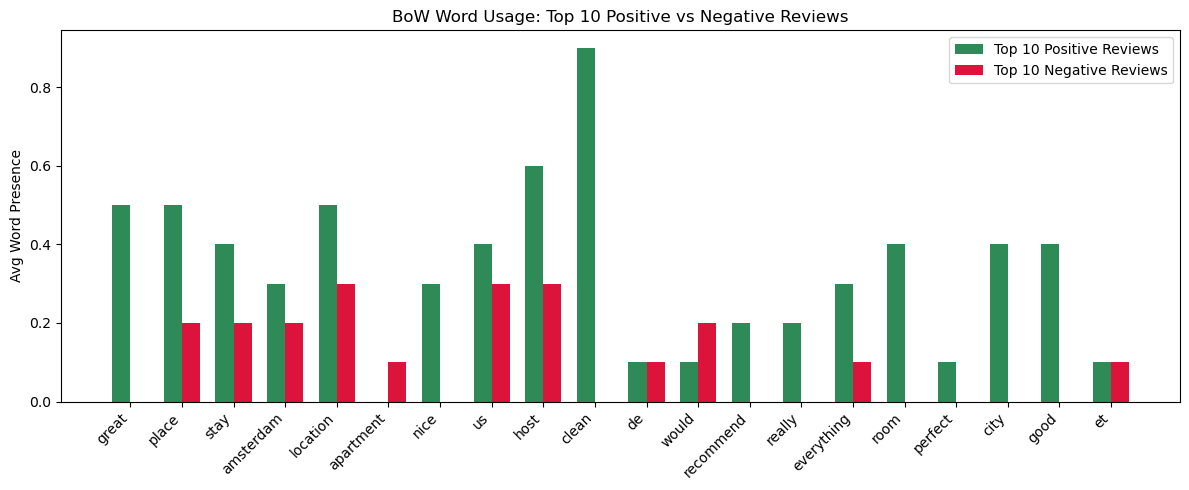

In [140]:
# BoW word usage: top 10 positive vs top 10 negative reviews
top_pos_reviews = bow_df.nlargest(10, "sentiment")
top_neg_reviews = bow_df.nsmallest(10, "sentiment")

pos_bow = top_pos_reviews[top_20_words].mean()
neg_bow = top_neg_reviews[top_20_words].mean()

plt.figure(figsize=(12, 5))
x = np.arange(len(top_20_words))
width = 0.35
plt.bar(x - width/2, pos_bow, width, label="Top 10 Positive Reviews", color="seagreen")
plt.bar(x + width/2, neg_bow, width, label="Top 10 Negative Reviews", color="crimson")
plt.xticks(x, top_20_words, rotation=45, ha="right")
plt.ylabel("Avg Word Presence")
plt.title("BoW Word Usage: Top 10 Positive vs Negative Reviews")
plt.legend()
plt.tight_layout()
plt.show()

## Score each listing

Aggregate all reviews by `listing_id` to get the overall sentiment for each Airbnb. Only listings with **≥ 5 reviews** are kept to avoid polarised scores from sparse data.

For each listing, we sum the positive and negative word counts across **all** its reviews, then compute:

$$\text{listing sentiment} = \frac{\sum \text{positive words} - \sum \text{negative words}}{\sum \text{positive words} + \sum \text{negative words}}$$

This gives a score from **-1** (entirely negative) to **+1** (entirely positive). Unlike averaging per-review scores, this approach weights longer, more detailed reviews proportionally.

In [141]:
# Aggregate sentiment by listing using total positive & negative counts
listing_sentiment = bow_df.groupby("listing_id").agg(
    total_pos=("pos_count", "sum"),
    total_neg=("neg_count", "sum"),
    review_count=("sentiment", "count")
).reset_index()

# Filter listing with less than 5 reviews
listing_sentiment = listing_sentiment[listing_sentiment["review_count"] >= 5]

# Calculate sentiment: (total_pos - total_neg) / (total_pos + total_neg)
total = listing_sentiment["total_pos"] + listing_sentiment["total_neg"]
listing_sentiment["avg_sentiment"] = ((listing_sentiment["total_pos"] - listing_sentiment["total_neg"]) / total).fillna(0.0)

top_positive = listing_sentiment.nlargest(10, "avg_sentiment")
top_negative = listing_sentiment.nsmallest(10, "avg_sentiment")

print(f"Analysed {len(listing_sentiment)} listings (with ≥5 reviews)\n")
print("Top 10 Most Positive Listings:")
print(top_positive[["listing_id", "avg_sentiment", "total_pos", "total_neg", "review_count"]].to_string(index=False))
print("\nTop 10 Most Negative Listings:")
print(top_negative[["listing_id", "avg_sentiment", "total_pos", "total_neg", "review_count"]].to_string(index=False))

Analysed 4958 listings (with ≥5 reviews)

Top 10 Most Positive Listings:
 listing_id  avg_sentiment  total_pos  total_neg  review_count
     219276            1.0         31          0            15
     550401            1.0         66          0            13
     575603            1.0         67          0            18
     733654            1.0         80          0            12
    1037485            1.0         67          0            16
    1113862            1.0         49          0            12
    1311373            1.0        182          0            33
    1331157            1.0         50          0            18
    1427610            1.0         18          0             5
    1558627            1.0        129          0            26

Top 10 Most Negative Listings:
 listing_id  avg_sentiment  total_pos  total_neg  review_count
   23647399      -0.500000          2          6             5
   50886022      -0.200000          2          3             5
   48005004  

## Top 10 Positive and Negative Listings

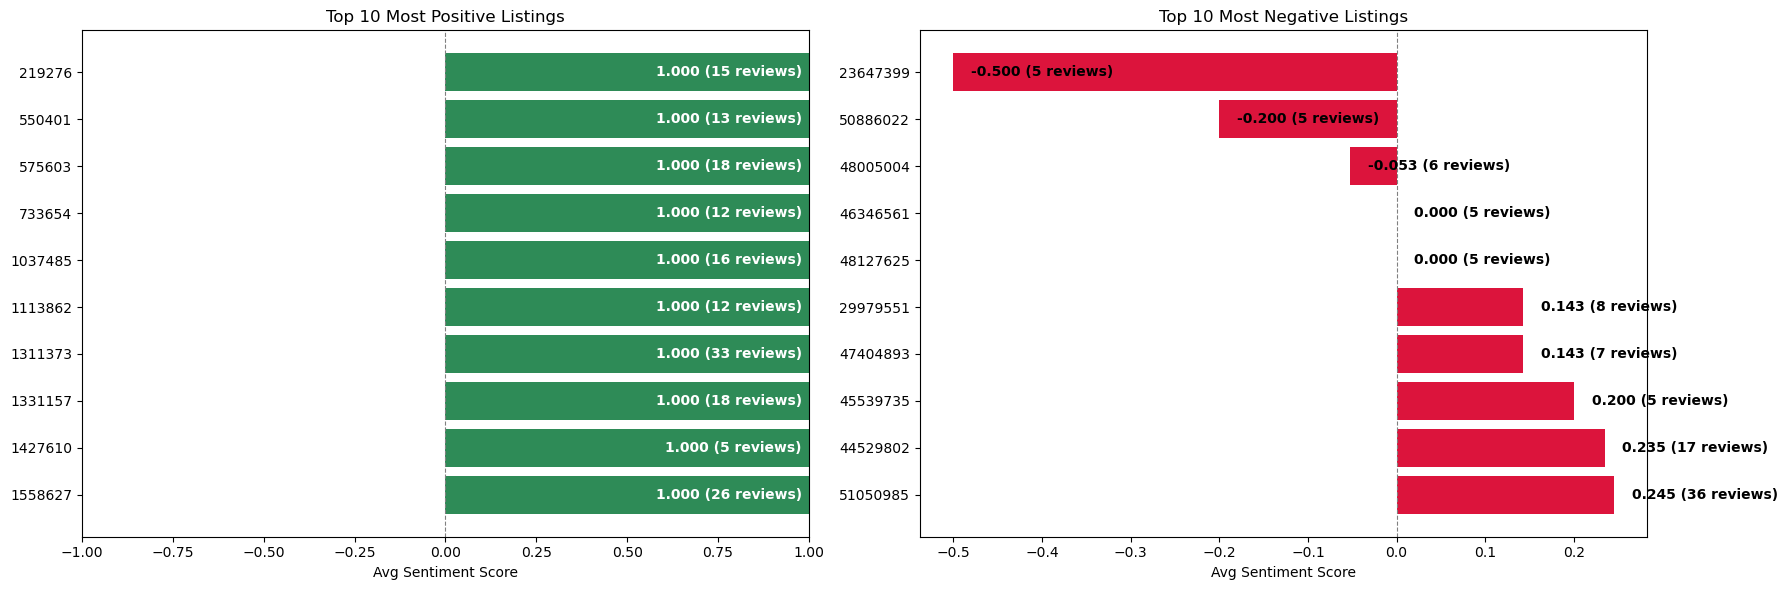

In [142]:
# Visualize top positive vs negative listings
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

axes[0].barh(top_positive["listing_id"].astype(str), top_positive["avg_sentiment"], color="seagreen")
axes[0].set_xlabel("Avg Sentiment Score")
axes[0].set_title("Top 10 Most Positive Listings")
axes[0].set_xlim(-1, 1)
axes[0].axvline(0, color="gray", linestyle="--", linewidth=0.8)
axes[0].invert_yaxis()
for i, (val, count) in enumerate(zip(top_positive["avg_sentiment"], top_positive["review_count"])):
    axes[0].text(val - 0.02, i, f"{val:.3f} ({count} reviews)", va="center", ha="right", color="white", fontweight="bold")

axes[1].barh(top_negative["listing_id"].astype(str), top_negative["avg_sentiment"], color="crimson")
axes[1].set_xlabel("Avg Sentiment Score")
axes[1].set_title("Top 10 Most Negative Listings")
axes[1].axvline(0, color="gray", linestyle="--", linewidth=0.8)
axes[1].invert_yaxis()
for i, (val, count) in enumerate(zip(top_negative["avg_sentiment"], top_negative["review_count"])):
    axes[1].text(val + 0.02, i, f"{val:.3f} ({count} reviews)", va="center", ha="left", color="black", fontweight="bold")

plt.tight_layout()

plt.show()

## Distribution of Sentiment Scores

Scores range from -1 (100% negative review) to +1 (100% positive review).
<br/>0 indicates that neither positive nor negative words were used, or the number of positive and negative words were equal, averaging the final sentiment as neutral.

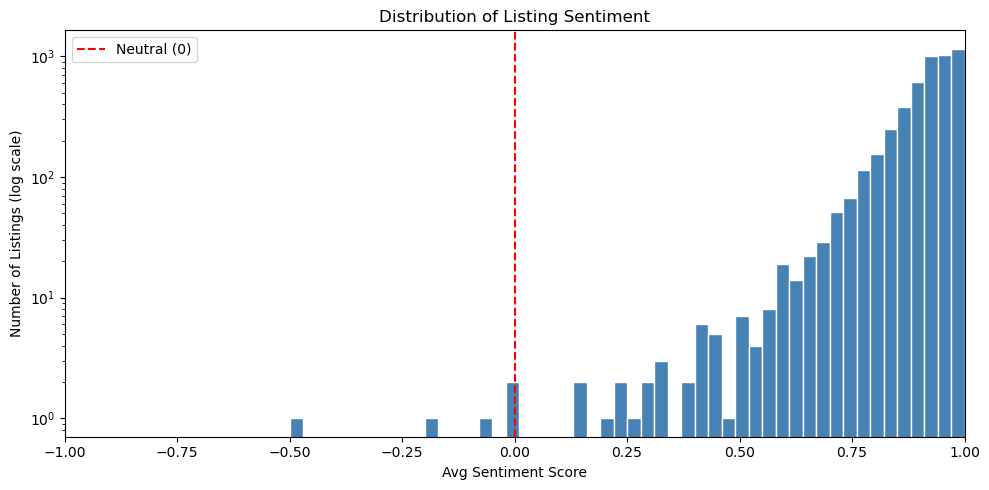

In [143]:
# Distribution of sentiment scores
plt.figure(figsize=(10, 5))
plt.hist(listing_sentiment["avg_sentiment"], bins=50, color="steelblue", edgecolor="white")
plt.axvline(0, color="red", linestyle="--", label="Neutral (0)")
plt.xlim(-1, 1)
plt.xlabel("Avg Sentiment Score")
plt.ylabel("Number of Listings (log scale)")
plt.title("Distribution of Listing Sentiment")
plt.yscale("log")
plt.legend()
plt.tight_layout()
plt.show()

## BoW usage

Compare the average presence of the top 20 frequent words across the 10 most positive and 10 most negative listings.

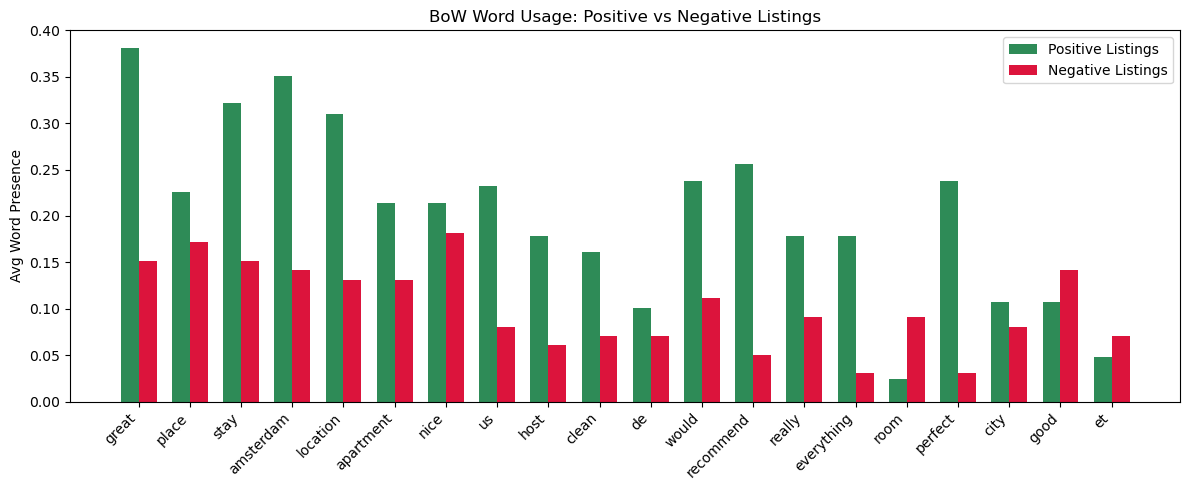

In [144]:
# BoW word usage: positive vs negative listings
pos_listing_ids = set(top_positive["listing_id"])
neg_listing_ids = set(top_negative["listing_id"])

pos_bow = bow_df[bow_df["listing_id"].isin(pos_listing_ids)][top_20_words].mean()
neg_bow = bow_df[bow_df["listing_id"].isin(neg_listing_ids)][top_20_words].mean()

plt.figure(figsize=(12, 5))
x = np.arange(len(top_20_words))
width = 0.35
plt.bar(x - width/2, pos_bow, width, label="Positive Listings", color="seagreen")
plt.bar(x + width/2, neg_bow, width, label="Negative Listings", color="crimson")
plt.xticks(x, top_20_words, rotation=45, ha="right")
plt.ylabel("Avg Word Presence")
plt.title("BoW Word Usage: Positive vs Negative Listings")
plt.legend()
plt.tight_layout()
plt.show()

In [148]:
# Total reviews analysed
total_reviews = len(bow_df)
print(f"Total reviews analysed: {total_reviews}")
# Total listings with ≥5 reviews: {len(listing_sentiment)}
print(f"Total listings with ≥5 reviews: {len(listing_sentiment)}")

Total reviews analysed: 342904
Total listings with ≥5 reviews: 4958


## Conclusion

### What was done
1. **Loaded** the Airbnb reviews dataset and **tokenized** each review into lowercase words.
2. **Built a word-frequency dictionary**, filtered out stopwords and non-alphabetic tokens, and identified the **top 20 most frequent words** in the corpus.
3. **Constructed a Bag-of-Words (BoW) matrix** — a binary vector per review indicating which of the top 20 words are present.
4. **Defined positive and negative word lists** using only words verified to exist in the dataset.
5. **Scored each review** using $\frac{pos - neg}{pos + neg}$, giving a value from -1 to +1.
6. **Aggregated scores per listing** by summing positive and negative word counts across all reviews (≥ 5 reviews filter), so longer reviews carry proportionally more weight.
7. **Visualised** the results: top/bottom listings, sentiment distribution, and BoW word usage patterns.

### Key findings
- **Top positive reviews** contain many positive sentiment words with zero negative words, scoring a perfect 1.0.
- **Top negative reviews** often contain very few sentiment words (sometimes just 1 negative word with 0 positive), making them vulnerable to extreme scores.
- **BoW word usage comparison** shows that top-20 frequent words appear at similar rates across positive and negative listings, since these are common hospitality terms used in most reviews regardless of sentiment.
- **The vast majority of Airbnb reviews are positive.** Out of 4,958 listings with ≥ 5 reviews, only 3 had a negative overall sentiment. The sentiment distribution is heavily right-skewed toward +1.

### Limitations of the BoW approach
- **No context or grammar** — BoW ignores word order, so *"not clean"* counts "clean" as positive.
- **Language bias** — the word lists are English-only, but the dataset contains reviews in other languages. Foreign-language reviews get scored based on the few English words they happen to contain.
- **Extreme scores from sparse data** — reviews with only 1 sentiment word get a score of ±1.0, which can be misleading at the individual review level (mitigated at the listing level by summing across reviews).
- **Score saturates at ±1.0** — if a review contains only positive words (0 negative), the formula reduces to $\frac{pos}{pos} = 1.0$ regardless of whether 1 or 15 positive words appeared. The same applies in reverse: any review with only negative words always scores -1.0. The formula captures the ratio of sentiment, not the magnitude.
- **No word weighting** — every positive/negative word counts equally; *"perfect"* carries the same weight as *"good"*.

### Better approaches
- **N-grams** — capture phrases like *"not clean"* as a unit instead of splitting into independent words.
- **VADER** — rule-based (NLTK), handles negation, intensifiers, and punctuation.
- **TF-IDF** — weight rare sentiment words higher than common ones.
- **Transformers (BERT)** — understand full sentence context. Most accurate but heavier compute.
- **Language detection** — filter or handle non-English reviews separately.